# Python: Drugie zadanie domowe

Drugie zadanie domowe będzie polegać na opracowaniu danych zawartych w pliku `gapminder.csv`, który znajduje się w tym katalogu (proszę wykorzystać ten plik, a nie ten w katalogu labs04). Ten arkusz poprowadzi Cię krok po kroku po zadaniu domowym.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**zad. 1** Wczytaj dane do zmiennej `data`, w taki sposób, żeby nazwa Państwa była kluczem.

In [2]:
data = pd.read_csv('gapminder.csv')

**zad. 2** Znajdź najbardziej i najmniej zaludnione państwa na świecie.

Najbardziej:

In [3]:
data[data['population'] == data['population'].max()]

,Country,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
33,China,22.91041,22.92176,7880.0,1.326691e+09,18.5,73.4,1.53


Najmniej:

In [4]:
data.loc[data['population'] == data['population'].min(), 'Country']

4    Antigua and Barbuda
Name: Country, dtype: object

**zad. 3** W ilu państwach współczynnik `female_BMI` jest większy od `male_BMI`.

In [5]:
data[data['female_BMI'] > data['male_BMI']].shape[0]

122

**zad. 4**
 1. Zainstaluj bibliotekę `pycountry_convert` i zaimportuj ją.
 1. Dodaj do danych kolumnę `continent`, która będzie zawierać nazwę kontynentu, na którym jest położone dane państwo. Wykorzystaj bibliotekę `pycountry_convert`. *Uwaga*: trzeba najpierw uzystać kod państwa w fomacie ISO-2, następnie uzystkać kod kontynentu, a na końcu uzyskać nazwę kontynentu.

In [6]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pycountry_convert as pc

In [8]:
list_of_countries = list(data['Country'].values)

In [9]:
converted_countries = []

for country in list_of_countries:
    converted_countries.append(pc.country_name_to_country_alpha2(country))
    


In [10]:
data['iso'] = converted_countries

In [11]:
continents_codes= []
for country_code in converted_countries:
    continents_codes.append(pc.country_alpha2_to_continent_code(country_code))

    

In [12]:
data['continents_codes'] = continents_codes

In [13]:
continents_names = []

for continent in continents_codes:
    continents_names.append(pc.convert_continent_code_to_continent_name(continent))

In [14]:
data['continent_name'] = continents_names

In [15]:
data.head()

,Country,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,iso,continents_codes,continent_name
0,Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,AF,AS,Asia
1,Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,AL,EU,Europe
2,Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,DZ,AF,Africa
3,Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,AO,AF,Africa
4,Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,AG,NA,North America


**zad. 5**
Oblicz ile osób mieszka na każdym z kontynentów.

In [16]:
data.groupby(continents_names).sum()['population']

Africa           9.772803e+08
Asia             3.949400e+09
Europe           7.219954e+08
North America    5.235798e+08
Oceania          3.425711e+07
South America    3.881582e+08
Name: population, dtype: float64

**zad. 6** Narysyj wykres słupkowy pokazujący ile państw leży na każdym z kontynentów.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

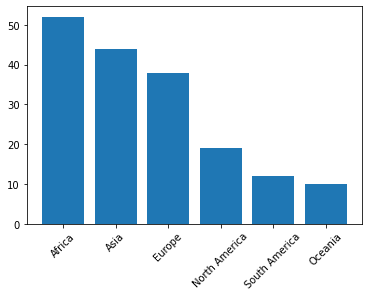

In [17]:
plt.bar(data['continent_name'].value_counts().index, 
       data['continent_name'].value_counts().values)
plt.xticks(rotation=45)

**zad. 7** 
 * Kolumna `gdp` zawiera informacje o PKB na obywatela. Stwórz nową kolumnę `gdp_total`, która będzie informować o PKB danego kraju.
 * Oblicz ile wynosi suma światowego PKB (kolumna `gdp_total`).
 * Oblicz ile krajów jest odpowiedzialnych za wytworzenie 80% światego PKB.

In [18]:
data['gdp_total'] = data['gdp'] * data['population']

In [19]:
sum(list(data['gdp_total'].values))

83385987338947.0

In [20]:
data.sort_values(by='gdp_total', ascending=False)

,Country,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,iso,continents_codes,continent_name,gdp_total
166,United States,28.34359,28.45698,50384.0,3.044731e+08,7.7,78.3,2.07,US,NA,North America,1.534057e+13
33,China,22.91041,22.92176,7880.0,1.326691e+09,18.5,73.4,1.53,CN,AS,Asia,1.045432e+13
71,India,21.31478,20.95956,3901.0,1.197070e+09,65.6,64.7,2.64,IN,AS,Asia,4.669770e+12
79,Japan,21.87088,23.50004,34800.0,1.273179e+08,3.4,82.5,1.34,JP,AS,Asia,4.430663e+12
58,Germany,25.73903,27.16509,41199.0,8.066591e+07,4.4,80.0,1.37,DE,EU,Europe,3.323355e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Vanuatu,28.45876,26.78926,2944.0,2.253350e+05,28.2,63.4,3.61,VU,OC,Oceania,6.633862e+08
157,Tonga,34.25969,30.99563,4748.0,1.028160e+05,17.0,70.3,4.01,TO,OC,Oceania,4.881704e+08
133,Sao Tome and Principe,24.88216,23.51233,2673.0,1.635950e+05,61.0,66.0,4.41,ST,AF,Africa,4.372894e+08
103,Micronesia,31.28402,28.10315,3197.0,1.044720e+05,43.1,68.0,3.59,FM,OC,Oceania,3.339970e+08


**zad. 8** Wyświetl wszystkie europejskie państwa, w których oczekiwana długość życia wynosi conajmniej 80 lat. 

In [21]:
data[(data['continent_name'] == 'Europe') & (data['life_expectancy'] >= 80)]

,Country,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,iso,continents_codes,continent_name,gdp_total
8,Austria,25.09414,26.46741,43952.0,8331465.0,4.6,80.4,1.41,AT,EU,Europe,3.661845e+11
54,France,24.82949,25.85329,37505.0,62309529.0,4.3,81.1,1.97,FR,EU,Europe,2.336919e+12
58,Germany,25.73903,27.16509,41199.0,80665906.0,4.4,80.0,1.37,DE,EU,Europe,3.323355e+12
60,Greece,24.92026,26.33786,32197.0,11161755.0,4.9,80.2,1.46,GR,EU,Europe,3.593750e+11
70,Iceland,26.02599,27.20687,42294.0,310033.0,2.7,82.4,2.12,IS,EU,Europe,1.311254e+10
75,Ireland,26.62176,27.65325,47713.0,4480145.0,4.5,80.1,2.00,IE,EU,Europe,2.137612e+11
77,Italy,24.79289,26.48020,37475.0,59319234.0,4.1,81.5,1.39,IT,EU,Europe,2.222988e+12
91,Luxembourg,26.09326,27.43404,95001.0,485079.0,2.8,81.0,1.63,LU,EU,Europe,4.608299e+10
99,Malta,27.04993,27.68361,27872.0,406392.0,6.6,80.7,1.38,MT,EU,Europe,1.132696e+10
112,Netherlands,25.47269,26.01541,47388.0,16519862.0,4.8,80.3,1.77,NL,EU,Europe,7.828432e+11


**zad. 9** Znajdź państwo, które ma najbardziej zbliżone PKB do Polski. Spróbuj rozwiązać to zadanie w jednej linijce.

**zad. 10 (ostatnie)**
 * Zobacz czy masz zainstalowaną bibliotekę `requests`, która sluży do wykonywania zapytań HTTP. Jeżeli nie, to zainstaluj ją. 
 * Uruchom z funkcję `requests.get` podając jako argument link: `https://aws.random.cat/meow`. Wynik zapisz do zmiennej response.
 * Wykonaj metodę `json()` na zmiennej `response` która zwróci Ci słownik, w którym będzie klucz `file`. Zapisz wartość `file` do zmiennej `url`.
 * Zaimportuj `Image` i `display` z biblioteki `from IPython.core.display`.
 * Stwórz obiekt Image podając w konstruktorze zmienną `url`,a wynik zapisz do `image`.
 * Wykonaj funkcję `display` na obiekcie `image`.
 